In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [2]:
df = pd.read_csv('mba_decision_dataset.csv')
df.columns

Index(['Person ID', 'Age', 'Gender', 'Undergraduate Major',
       'Undergraduate GPA', 'Years of Work Experience', 'Current Job Title',
       'Annual Salary (Before MBA)', 'Has Management Experience',
       'GRE/GMAT Score', 'Undergrad University Ranking',
       'Entrepreneurial Interest', 'Networking Importance',
       'MBA Funding Source', 'Desired Post-MBA Role',
       'Expected Post-MBA Salary', 'Location Preference (Post-MBA)',
       'Reason for MBA', 'Online vs. On-Campus MBA', 'Decided to Pursue MBA?'],
      dtype='object')

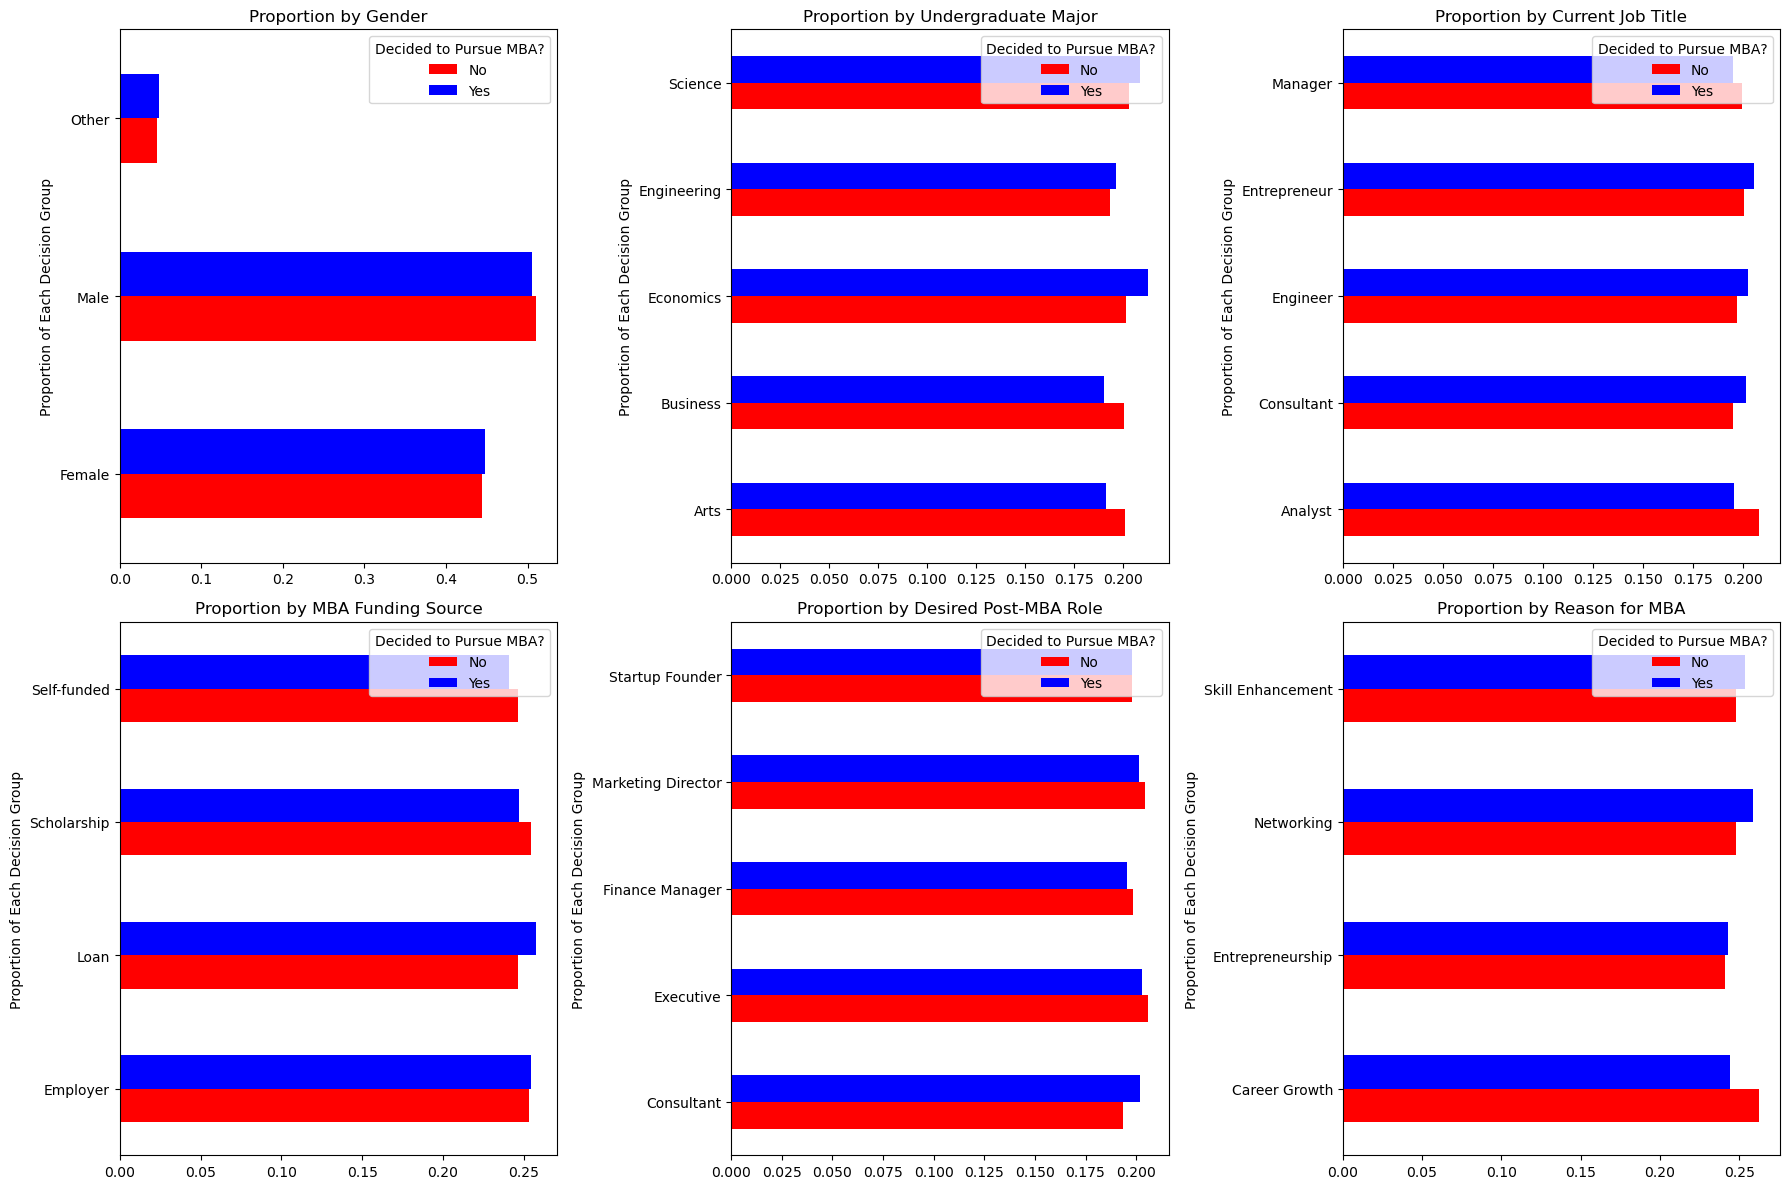

In [3]:
# visualizes how different categorical variables (from categorical_columns) are distributed with
# respect to the decision on pursuing an MBA by grouping, normalizing counts into proportions, 
# and plotting horizontal bar charts on a grid of subplots

categorical_columns = [
    'Gender', 
    'Undergraduate Major', 
    'Current Job Title', 
    'MBA Funding Source', 
    'Desired Post-MBA Role', 
    'Reason for MBA'
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    data = df.groupby([column, 'Decided to Pursue MBA?']).size().unstack()
    data_normalized = data.div(data.sum(axis=0), axis=1)  # normalize by total MBA/non-MBA count
    
    data_normalized.plot(kind='barh', stacked=False, ax=axes[i], color=['red', 'blue'])
    
    axes[i].set_title(f"Proportion by {column}")
    axes[i].set_ylabel("Proportion of Each Decision Group")
    axes[i].legend(title="Decided to Pursue MBA?")

plt.tight_layout()
plt.show()

save.

In this figure, we examine how various aspects of a candidate’s background relate to their decision to pursue an MBA by analyzing six key factors: Gender, Undergraduate Major, Current Job Title, MBA Funding Source, Desired Post-MBA Role, and Reason for MBA. Each panel displays a horizontal bar chart for one of these categorical features.

Due to the overall imbalance in our dataset—where approximately 5,900 candidates decided to pursue an MBA compared to 4,100 who did not—we normalized the data by dividing each value by the total count in its corresponding MBA decision column. This approach allows us to compare the proportion of each feature across the two groups.

The normalized charts reveal that the distributions between those who chose to pursue an MBA and those who did not are quite similar. This suggests that, when accounting for the imbalance in total counts, the data is evenly distributed across the different categorical variables.

In [5]:
alt.data_transformers.disable_max_rows()

# visualizes the distribution of GPA and GMAT score for different majors
options = ['All'] + sorted(df['Undergraduate Major'].unique())

major_dropdown = alt.binding_select(options=options, name='Undergraduate Major: ')
selected_major = alt.param('selected_major', value='All', bind=major_dropdown)

chart = alt.Chart(df).add_params(
    selected_major
).transform_filter(
    "datum['Undergraduate Major'] == selected_major || selected_major == 'All'"
).mark_circle(size=64, opacity=0.7).encode(
    x=alt.X('Undergraduate GPA:Q', title='Undergraduate GPA', scale=alt.Scale(domain=[2.0, 4.0])),
    y=alt.Y('GRE/GMAT Score:Q', title='GRE/GMAT Score', scale=alt.Scale(domain=[250, 800])),
    color=alt.Color(
        'Decided to Pursue MBA?:N', 
        scale=alt.Scale(domain=['No', 'Yes'], range=['red', 'blue']),
        title='MBA Decision'
    ),
    tooltip=[
        alt.Tooltip('Undergraduate Major:N', title='Major'),
        alt.Tooltip('Undergraduate GPA:Q', title='Undergrad GPA'),
        alt.Tooltip('GRE/GMAT Score:Q', title='GRE/GMAT Score'),
        alt.Tooltip('Years of Work Experience:Q', title='Years of Work Experience'),
        alt.Tooltip('Decided to Pursue MBA?:N', title='MBA Decision')
    ]
).properties(
    title="Interactive Scatter: Undergraduate GPA vs. GRE/GMAT Score",
    width=900,
    height=600
)

chart

/Users/jingcheng/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/jingcheng/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/jingcheng/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/jingcheng/anaco

alt.Chart(...)

This interactive scatter plot examines the relationship between academic performance and standardized test scores among prospective MBA candidates. The horizontal axis represents the Undergraduate GPA (ranging from 2.0 to 4.0), while the vertical axis displays the GRE/GMAT Score (with a domain from 250 to 800). Each data point corresponds to an individual candidate and is color-coded to indicate whether they decided to pursue an MBA.

A key feature of this visualization is the dropdown filter for Undergraduate Major, which allows users to focus on specific fields of study. By selecting a particular major, one can compare their stats with people in a similar major, and how these might correlate with the MBA decision. Tooltips enrich the experience by providing additional information, such as work experience and detailed academic metrics, thereby giving users more to explore.